# Darstellung der Ergebnisse der Klassifizierung in Karten

In diesem Jupyter Notebook wurden die Klassifizierungen in Karten dargestellt.  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas
from matplotlib.colors import ListedColormap

In [3]:
featuresDf = pandas.read_csv("../daten/merkmale_datensatz_43_45_bis_51/merkmaleMitLabelnFuzzyVersuch6.csv")

In [9]:
featuresDf['Klasse'].value_counts()

1    63909
0    39591
2    12290
Name: Klasse, dtype: int64

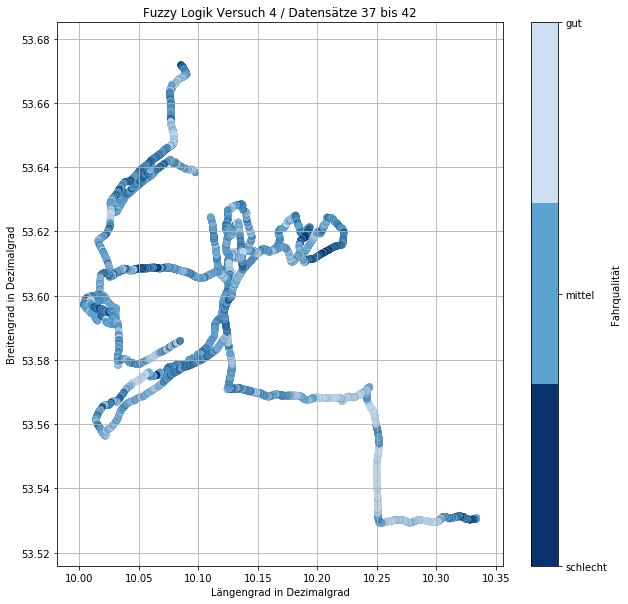

In [11]:
plt.figure(figsize=(10,10))
cmapD = ListedColormap(['#cddff1','#5ba3d0','#08316d'])
plt.title('Fuzzy Logik Versuch 4 / Datensätze 37 bis 42')
sca = plt.scatter(featuresDf['Laengengrad'], featuresDf['Breitengrad'], c=featuresDf['Klasse'], cmap=cmapD, alpha=0.1)
cbar = plt.colorbar(sca,ticks=[2, 1, 0]) 
cbar.set_label("Fahrqualität")
cbar.set_alpha(1)
cbar.draw_all()
cbar.ax.invert_yaxis()
cbar.ax.set_yticklabels(['schlecht', 'mittel', 'gut']) 
plt.xlabel('Längengrad in Dezimalgrad')
plt.ylabel('Breitengrad in Dezimalgrad')
plt.grid()
plt.savefig("karteFuzzyVersuch4_datensatz37_bis_42.png")

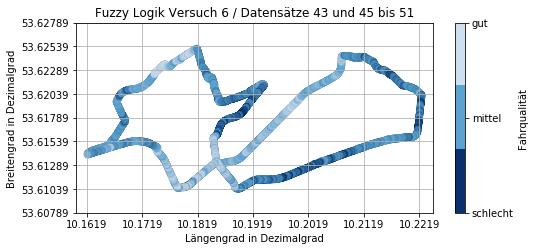

In [4]:
fig = plt.figure(figsize=(8,3.5))
cmapD = ListedColormap(['#cddff1','#5ba3d0','#08316d'])
plt.title('Fuzzy Logik Versuch 6 / Datensätze 43 und 45 bis 51')
sca = plt.scatter(featuresDf['Laengengrad'], featuresDf['Breitengrad'], c=featuresDf['Klasse'], cmap=cmapD, alpha=0.1)
cbar = plt.colorbar(sca,ticks=[2, 1, 0]) 
cbar.set_label("Fahrqualität")
cbar.set_alpha(1)
cbar.draw_all()
cbar.ax.invert_yaxis()
cbar.ax.set_yticklabels(['schlecht', 'mittel', 'gut']) 
plt.xlabel('Längengrad in Dezimalgrad')
plt.ylabel('Breitengrad in Dezimalgrad')
plt.xlim(featuresDf['Laengengrad'].min()-0.002,featuresDf['Laengengrad'].max()+0.002)
plt.ylim(featuresDf['Breitengrad'].min()-0.002,featuresDf['Breitengrad'].max()+0.002)
plt.xticks(np.arange(featuresDf['Laengengrad'].min(),featuresDf['Laengengrad'].max(),0.01))
plt.yticks(np.arange(featuresDf['Breitengrad'].min()-0.0025,featuresDf['Breitengrad'].max()+0.003,0.0025))
plt.grid()
plt.savefig("karteFuzzyVersuch6_datensatz43_45_bis_51.png")

In [103]:
featuresDf['Breitengrad'].min()

53.610390000000002

In [5]:
featuresDf = featuresDf[featuresDf['Klasse'] != 1]
i = 0
while i < featuresDf.shape[0]:
    labelNr = featuresDf['Klasse'].iloc[i]
    if labelNr == 2:
        featuresDf.iat[i,29] = 1
    i = i + 1

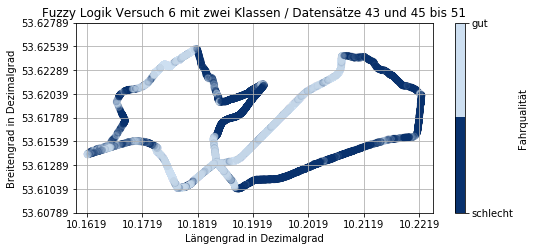

In [6]:
fig = plt.figure(figsize=(8,3.5))
cmapD = ListedColormap(['#cddff1','#08316d'])
plt.title('Fuzzy Logik Versuch 6 mit zwei Klassen / Datensätze 43 und 45 bis 51')
sca = plt.scatter(featuresDf['Laengengrad'], featuresDf['Breitengrad'], c=featuresDf['Klasse'], cmap=cmapD, alpha=0.1)
cbar = plt.colorbar(sca,ticks=[1, 0])
cbar.set_label("Fahrqualität")
cbar.set_alpha(1)
cbar.draw_all()
cbar.ax.invert_yaxis()
cbar.ax.set_yticklabels(['schlecht','gut'])
plt.xlabel('Längengrad in Dezimalgrad')
plt.ylabel('Breitengrad in Dezimalgrad')
plt.xlim(featuresDf['Laengengrad'].min()-0.002,featuresDf['Laengengrad'].max()+0.002)
plt.ylim(featuresDf['Breitengrad'].min()-0.002,featuresDf['Breitengrad'].max()+0.002)
plt.xticks(np.arange(featuresDf['Laengengrad'].min(),featuresDf['Laengengrad'].max(),0.01))
plt.yticks(np.arange(featuresDf['Breitengrad'].min()-0.0025,featuresDf['Breitengrad'].max()+0.003,0.0025))
plt.grid()
plt.savefig("karteFuzzyVersuch6_2Klassen_datensatz43_45_bis_51.png")

In [26]:
featuresDf['Laengengrad'].min()

10.161906

## OpenStreetMap Route Generator

Mit den folgenden Zellen ist es möglich zu einem erfassten Datensatz eine Route in OpenStreetMap (OSM) zu erstellen. Als API wurde die OSM Test API genutzt. Der Aufruf der OSM API und Bearbeitung erfolgte mit den OSM Python wrapper [osmapi](https://github.com/metaodi/osmapi).

In [2]:
from osmapi import OsmApi
from haversine import haversine

In [9]:
MyApi = OsmApi(api="https://api06.dev.openstreetmap.org", username = u"morro34@hotmail.de", passwordfile = "C:/Users/morro/Documents/osmapipw/passwort.txt")

In [10]:
MyApi.ChangesetCreate({u"test": u"My first test"})

126676

In [12]:
featuresDf = pandas.read_csv("../daten/merkmale_datensatz_43_45_bis_51/merkmaleMitLabelnFuzzyVersuch6.csv")

In [13]:
haversine([featuresDf['Breitengrad'].iloc[0],featuresDf['Laengengrad'].iloc[0]], [featuresDf['Breitengrad'].iloc[2],featuresDf['Laengengrad'].iloc[2]]) * 1000

2.383498981571627

In [14]:
featuresDf = featuresDf[:8000]

Die folgenden zwei Zellen erstellen eine Route (Relation) für OSM.
Dabei gibt maxMeter den maximalen Abstand zwischen zwei Knoten an (Nodes). Ein Knoten besteht aus den Koordinaten Breitengrad und Längengrad sowie Attributen.
Zwei Knoten werden dann durch eine Linie als Weg (Way) verbunden. Diesen Weg wird dann das Tag bzw. Attribut [smoothness](https://wiki.openstreetmap.org/wiki/Key:smoothness) zugeordnet. Hierbei muss der linguistische smoothness Wert berechnet werden.
Dies geschieht indem die häufigste klassifizierte Klasse der Daten ausgewählt wird. Die Klassen "gut", "mittel" und "schlecht" werden dabei den smoothness Werten "good","intermediate","bad" zugeordnet.

In [22]:
maxMeter = 100
ways = []
i = 0
smoothnessGood = 0
smoothnessIntermediate = 0
smoothnessBad = 0
countFeatures = 0
smoothness = 'unknown'
maxLength = len(featuresDf) - 1
lastNode = MyApi.NodeCreate({u"lon":featuresDf['Laengengrad'].iloc[i], u"lat":featuresDf['Breitengrad'].iloc[i], u"tag": {}}).get('id')
if featuresDf['Klasse'].iloc[i] == 0:
       smoothnessGood = smoothnessGood + 1
elif featuresDf['Klasse'].iloc[i] == 1:
       smoothnessIntermediate = smoothnessIntermediate + 1 
elif featuresDf['Klasse'].iloc[i] == 2:
       smoothnessBad = smoothnessBad + 1
countFeatures = + 1  

In [24]:
while i < maxLength:
    if featuresDf['Klasse'].iloc[i+1] == 0:
        smoothnessGood = smoothnessGood + 1
    elif featuresDf['Klasse'].iloc[i+1] == 1:
        smoothnessIntermediate = smoothnessIntermediate + 1 
    elif featuresDf['Klasse'].iloc[i+1] == 2:
        smoothnessBad = smoothnessBad + 1
    countFeatures = countFeatures + 1 
    sumMeter = sumMeter + haversine([featuresDf['Laengengrad'].iloc[i],featuresDf['Breitengrad'].iloc[i]], [featuresDf['Laengengrad'].iloc[i+1],featuresDf['Breitengrad'].iloc[i+1]]) * 1000
    if sumMeter > maxMeter:
        if smoothnessGood > smoothnessIntermediate and smoothnessGood > smoothnessBad:
            smoothness = 'good'
        elif smoothnessIntermediate > smoothnessBad:
            smoothness = 'intermediate'
        else:
            smoothness = 'bad' 
        smoothnessGood = 0
        smoothnessIntermediate = 0
        smoothnessBad = 0
        countFeatures = 0
        sumMeter = 0
        node = MyApi.NodeCreate({u"lon":featuresDf['Laengengrad'].iloc[i+1], u"lat":featuresDf['Breitengrad'].iloc[i+1], u"tag": {}}).get('id')
        ways.append(MyApi.WayCreate(
            {   'nd': [lastNode, node],
            'tag': { u'highway':'*',
                   u'smoothness':smoothness} 
            }).get('id'))
        lastNode = node
    i = i + 1

In [25]:
membersList = []
for way in ways:
    membersList.append({
      "type": "way",
      "ref": way,
      "role": ""
    })

In [26]:
MyApi.RelationCreate({
        'member':  membersList,
    'tag': {"name": "Höltigbaum Route"}
    })

{'changeset': 126676,
 'id': 4304706491,
 'member': [{'ref': 4305060119, 'role': '', 'type': 'way'},
  {'ref': 4305060120, 'role': '', 'type': 'way'},
  {'ref': 4305060121, 'role': '', 'type': 'way'},
  {'ref': 4305060122, 'role': '', 'type': 'way'},
  {'ref': 4305060123, 'role': '', 'type': 'way'},
  {'ref': 4305060124, 'role': '', 'type': 'way'},
  {'ref': 4305060125, 'role': '', 'type': 'way'},
  {'ref': 4305060126, 'role': '', 'type': 'way'},
  {'ref': 4305060127, 'role': '', 'type': 'way'},
  {'ref': 4305060128, 'role': '', 'type': 'way'},
  {'ref': 4305060129, 'role': '', 'type': 'way'},
  {'ref': 4305060130, 'role': '', 'type': 'way'},
  {'ref': 4305060131, 'role': '', 'type': 'way'},
  {'ref': 4305060132, 'role': '', 'type': 'way'},
  {'ref': 4305060133, 'role': '', 'type': 'way'},
  {'ref': 4305060134, 'role': '', 'type': 'way'},
  {'ref': 4305060135, 'role': '', 'type': 'way'},
  {'ref': 4305060136, 'role': '', 'type': 'way'},
  {'ref': 4305060137, 'role': '', 'type': 'way'},